In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

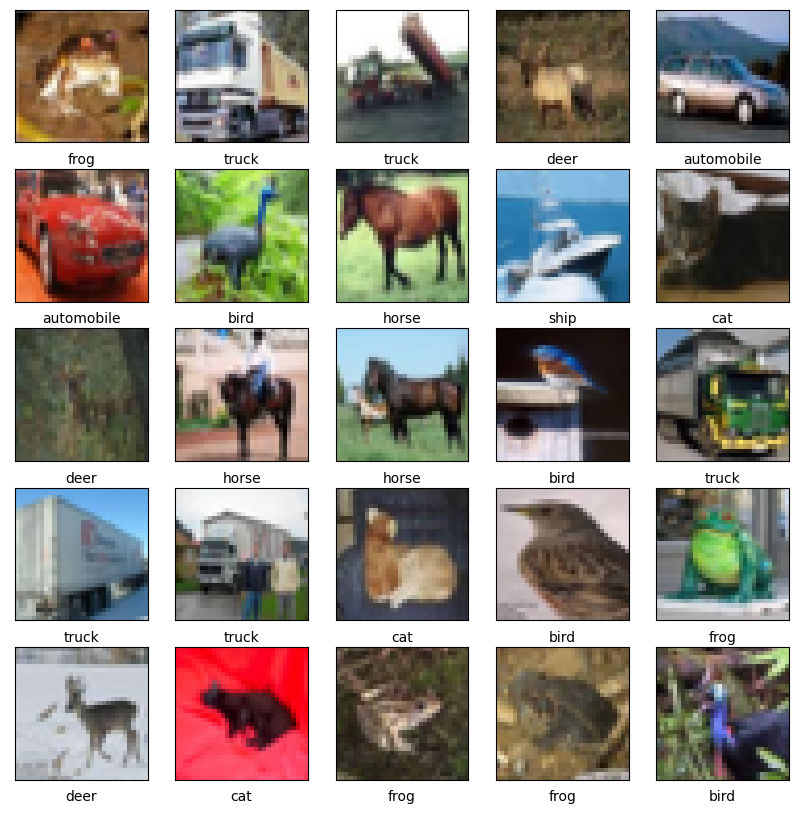

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
train_images[1]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

In [5]:
train_images[1].shape

(32, 32, 3)

In [9]:
train_images[1][31]

array([[0.63921569, 0.58039216, 0.47058824],
       [0.61960784, 0.58039216, 0.47843137],
       [0.63921569, 0.61176471, 0.52156863],
       [0.56862745, 0.52941176, 0.49019608],
       [0.16862745, 0.1254902 , 0.1254902 ],
       [0.0745098 , 0.03529412, 0.04705882],
       [0.07843137, 0.05490196, 0.0745098 ],
       [0.29019608, 0.26666667, 0.2745098 ],
       [0.5254902 , 0.49019608, 0.47843137],
       [0.46666667, 0.43137255, 0.41960784],
       [0.43137255, 0.39607843, 0.38823529],
       [0.38823529, 0.36470588, 0.35686275],
       [0.23921569, 0.24705882, 0.24313725],
       [0.10588235, 0.12156863, 0.11764706],
       [0.07058824, 0.08235294, 0.07843137],
       [0.06666667, 0.07843137, 0.08235294],
       [0.09803922, 0.13333333, 0.16470588],
       [0.11372549, 0.14509804, 0.18823529],
       [0.0627451 , 0.07843137, 0.10980392],
       [0.01960784, 0.02352941, 0.04313725],
       [0.02352941, 0.02352941, 0.04313725],
       [0.03921569, 0.03529412, 0.04705882],
       [0.

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(10, (3, 3), activation='relu', input_shape=(10, 10, 2)))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [20]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 8, 8, 10)          190       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 4, 4, 10)         0         
 2D)                                                             
                                                                 
Total params: 190
Trainable params: 190
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [16]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

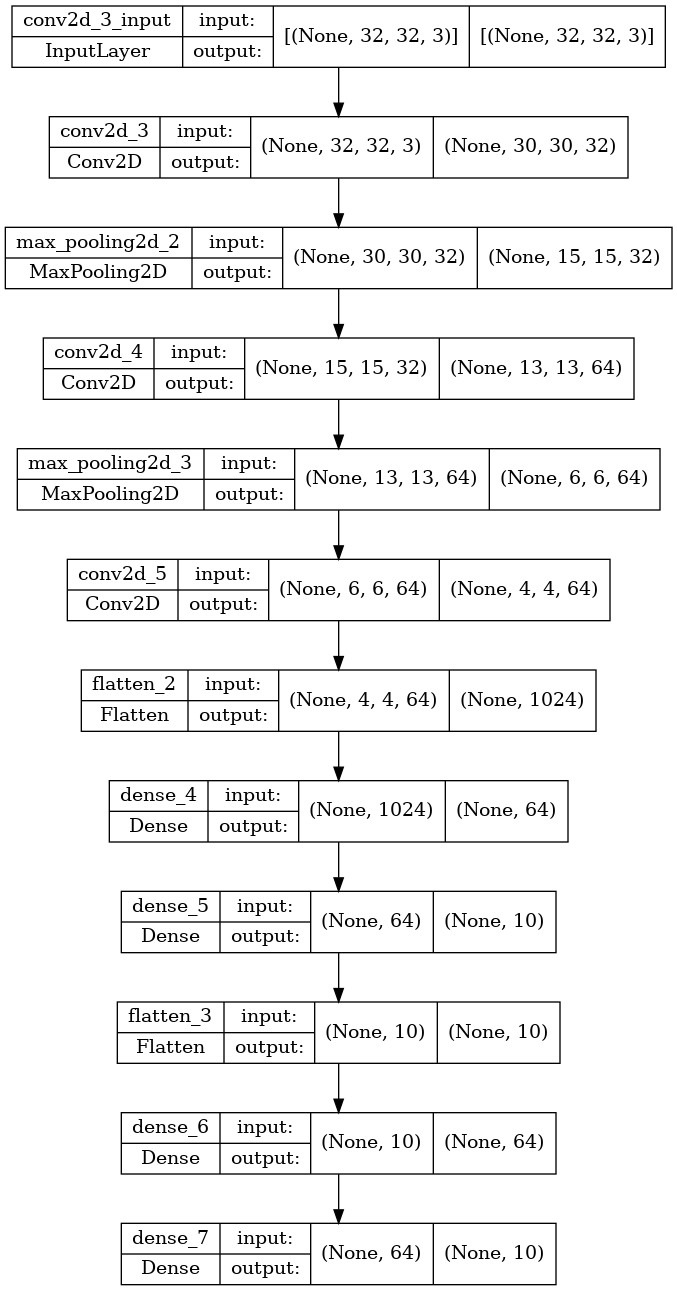

In [21]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

In [23]:
model.predict(test_images[0])

ValueError: in user code:

    File "/home/aremorov/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "/home/aremorov/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/aremorov/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "/home/aremorov/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1751, in predict_step
        return self(x, training=False)
    File "/home/aremorov/anaconda3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/aremorov/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 32, 32, 3), found shape=(32, 32, 3)


In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.6079 - accuracy: 0.4028 - val_loss: 1.3902 - val_accuracy: 0.4847
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.2409 - accuracy: 0.5518 - val_loss: 1.2071 - val_accuracy: 0.5699
Epoch 3/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0872 - accuracy: 0.6130 - val_loss: 1.0575 - val_accuracy: 0.6300
Epoch 4/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.9887 - accuracy: 0.6487 - val_loss: 1.0291 - val_accuracy: 0.6421
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9096 - accuracy: 0.6783 - val_loss: 0.9783 - val_accuracy: 0.6582
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8530 - accuracy: 0.6995 - val_loss: 0.9022 - val_accuracy: 0.6837
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8007 - accuracy: 0.7185 - val_loss: 0.9084 -

In [25]:
train_labels[5]

array([1], dtype=uint8)

313/313 - 1s - loss: 0.9303 - accuracy: 0.6876 - 567ms/epoch - 2ms/step


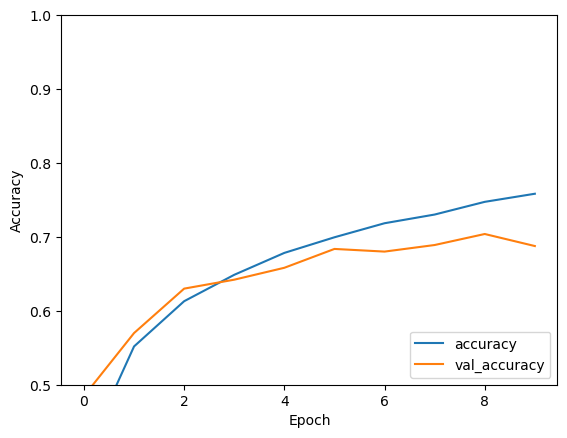

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [20]:
print(test_acc)

0.6876000165939331
